In [47]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules

#mlxtend library is used for apriori

In [3]:
data = pd.read_excel('Online Retail.xlsx')

In [48]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
data.columns

#columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
data.shape

#(rows, columns)

(541909, 8)

In [7]:
data.isnull().values.any()

#check for null vals

True

In [8]:
data.isnull().sum()

#finding null vals

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# DATA PRE PROCESSING

In [9]:
data_fil = data[data['Description']!= 'POSTAGE']

#Filtering data to remove rows with postage.

In [10]:
data_fil.shape

#(rows, columns)

(540657, 8)

In [11]:
# Stripping extra spaces in the description 

data_fil['Description'] = data_fil['Description'].str.strip() 
  
# Dropping the rows without any invoice number 

data_fil.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
data_fil['InvoiceNo'] = data_fil['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit (invoice numbers starting with c) - Not including them

data_fil = data_fil[~data_fil['InvoiceNo'].str.contains('C')]

<ipython-input-11-8c9fe8318544>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fil['Description'] = data_fil['Description'].str.strip()
<ipython-input-11-8c9fe8318544>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fil.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
<ipython-input-11-8c9fe8318544>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [12]:
data.Country.unique()

#There are transcation by people from different countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [80]:
data.Description.unique().size

4224

# Analysis for France

In [13]:
basket_France = (data_fil[data_fil['Country'] =="France"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

#Only considering France transactions

In [14]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


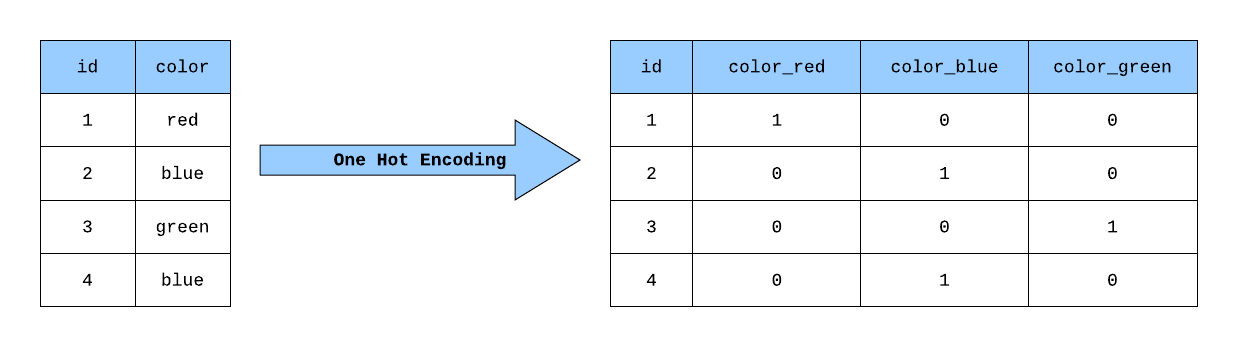

In [15]:
#Hot encoding function:

def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [16]:
basket_encoded = basket_France.applymap(hot_encode) 
basket_France = basket_encoded

In [17]:
basket_France.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Apriori


In [81]:
# Building the model 
frq_items = apriori(basket_France, min_support = 0.1, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [82]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,0.087421,34.832041
11,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,0.086353,34.418605
8,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.129199,0.139535,0.124031,0.960000,6.880000,0.106003,21.511628
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.139535,0.129199,0.124031,0.888889,6.880000,0.106003,7.837209
10,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.124031,0.134367,0.100775,0.812500,6.046875,0.084110,4.616710
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.129199,0.134367,0.103359,0.800000,5.953846,0.085999,4.328165
13,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.129199,0.103359,0.100775,0.780000,7.546500,0.087421,4.075640
7,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.134367,0.129199,0.103359,0.769231,5.953846,0.085999,3.773471
4,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.134367,0.139535,0.103359,0.769231,5.512821,0.084610,3.728682
2,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.139535,0.173127,0.105943,0.759259,4.385572,0.081786,3.434705


In [46]:
Item = {'SET/6 RED SPOTTY PAPER PLATES'}

rules[rules['antecedents']== Item]['consequents']

8                         (SET/6 RED SPOTTY PAPER CUPS)
6                  (SET/20 RED RETROSPOT PAPER NAPKINS)
13    (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
Name: consequents, dtype: object

In [83]:
rules.shape

(16, 9)

Rules here contains the different combinations of frequently occuring items, sorted by confidence.

# Analysis for Germany


In [20]:
basket_Germany = (data_fil[data_fil['Country'] =="Germany"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

#Only considering Germany transactions

In [21]:
basket_encoded = basket_Germany.applymap(hot_encode) 
basket_Germany = basket_encoded

#using the already defined one hot encoding funcyion

In [22]:
basket_Germany.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Apriori


In [23]:
# Building the model 
frq_items = apriori(basket_Germany, min_support = 0.1, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [24]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.160356,0.249443,0.13363,0.833333,3.340774,0.09363,4.503341
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.249443,0.160356,0.13363,0.535714,3.340774,0.09363,1.808463


In [42]:
Item = {'ROUND SNACK BOXES SET OF 4 FRUITS'}

rules[rules['antecedents']== Item]['consequents']

1    (ROUND SNACK BOXES SET OF4 WOODLAND)
Name: consequents, dtype: object

# Combined Analysis


In [50]:
basket = (data_fil
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

In [51]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
basket_encoded = basket.applymap(hot_encode) 
basket = basket_encoded

In [53]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
basket.shape

(20533, 4193)

# Using Apriori


In [102]:
# Building the model 
frq_items = apriori(basket, min_support = 0.02, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [130]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
149,ROSES REGENCY TEACUP AND SAUCER,(GREEN REGENCY TEACUP AND SAUCER),0.029173,0.049433,0.026397,0.904841,18.304540,0.024954,9.989296
150,GREEN REGENCY TEACUP AND SAUCER,(ROSES REGENCY TEACUP AND SAUCER),0.030828,0.051916,0.026397,0.856240,16.492663,0.024796,6.594911
23,PINK REGENCY TEACUP AND SAUCER,(GREEN REGENCY TEACUP AND SAUCER),0.037306,0.049433,0.030828,0.826371,16.717114,0.028984,5.474696
155,JUMBO STORAGE BAG SUKI,(JUMBO BAG RED RETROSPOT),0.025082,0.101885,0.020114,0.801942,7.871066,0.017559,4.534601
137,PINK REGENCY TEACUP AND SAUCER,(ROSES REGENCY TEACUP AND SAUCER),0.037306,0.051916,0.029173,0.781984,15.062368,0.027236,4.348695


In [190]:
rules.shape

(160, 9)

# Saving data into a file


In [140]:
store = rules["antecedents"].unique()

Store = pd.DataFrame(store, columns=['Items'])

Store = Store.sort_values(by =["Items"])

In [144]:
#rules["antecedents"] = rules["antecedents"].unique().apply(lambda x: list(x)[0]).astype("unicode")
#rules["antecedents"]




In [148]:
#Store['Items'].to_csv('File2.csv', index=False, header=False)
Store['Items'].to_csv('File2.csv', index=False)

In [149]:
#rules['antecedents'].to_csv('File2.csv', index=False)

# Trial of taking input from a file and outputting the consequents


In [150]:
ans = pd.read_csv('File2.csv')

In [151]:
ans.head()

,Items
0,60 TEATIME FAIRY CAKE CASES
1,ALARM CLOCK BAKELIKE GREEN
2,ALARM CLOCK BAKELIKE PINK
3,ALARM CLOCK BAKELIKE RED
4,CHARLOTTE BAG PINK POLKADOT


In [179]:
final = pd.DataFrame(columns = ['Antecedent', 'Consequent'])

for item in ans["Items"]:
    for x in rules[rules['antecedents']== item]['consequents']:
        final = final.append({'Antecedent' : item , 'Consequent' : list(x)[0]}, ignore_index = True)
        #final['Antecedent']= item
        #final['Consequent']= 
        #print('Antecedent: ',item,' Consequent:', list(x)[0])

Antecedent:  60 TEATIME FAIRY CAKE CASES  Consequent: PACK OF 72 RETROSPOT CAKE CASES
Antecedent:  ALARM CLOCK BAKELIKE GREEN  Consequent: ALARM CLOCK BAKELIKE RED
Antecedent:  ALARM CLOCK BAKELIKE GREEN  Consequent: ALARM CLOCK BAKELIKE PINK
Antecedent:  ALARM CLOCK BAKELIKE PINK  Consequent: ALARM CLOCK BAKELIKE RED
Antecedent:  ALARM CLOCK BAKELIKE PINK  Consequent: ALARM CLOCK BAKELIKE GREEN
Antecedent:  ALARM CLOCK BAKELIKE RED  Consequent: ALARM CLOCK BAKELIKE GREEN
Antecedent:  ALARM CLOCK BAKELIKE RED  Consequent: ALARM CLOCK BAKELIKE PINK
Antecedent:  CHARLOTTE BAG PINK POLKADOT  Consequent: RED RETROSPOT CHARLOTTE BAG
Antecedent:  CHARLOTTE BAG SUKI DESIGN  Consequent: RED RETROSPOT CHARLOTTE BAG
Antecedent:  CHARLOTTE BAG SUKI DESIGN  Consequent: WOODLAND CHARLOTTE BAG
Antecedent:  CHARLOTTE BAG SUKI DESIGN  Consequent: STRAWBERRY CHARLOTTE BAG
Antecedent:  DOLLY GIRL LUNCH BOX  Consequent: SPACEBOY LUNCH BOX
Antecedent:  DOTCOM POSTAGE  Consequent: JUMBO BAG RED RETROSPOT
A

Antecedent:  STRAWBERRY CHARLOTTE BAG  Consequent: RED RETROSPOT CHARLOTTE BAG
Antecedent:  STRAWBERRY CHARLOTTE BAG  Consequent: CHARLOTTE BAG SUKI DESIGN
Antecedent:  WHITE HANGING HEART T-LIGHT HOLDER  Consequent: RED HANGING HEART T-LIGHT HOLDER
Antecedent:  WHITE HANGING HEART T-LIGHT HOLDER  Consequent: JUMBO BAG RED RETROSPOT
Antecedent:  WHITE HANGING HEART T-LIGHT HOLDER  Consequent: NATURAL SLATE HEART CHALKBOARD
Antecedent:  WOODEN FRAME ANTIQUE WHITE  Consequent: WOODEN PICTURE FRAME WHITE FINISH
Antecedent:  WOODEN PICTURE FRAME WHITE FINISH  Consequent: WOODEN FRAME ANTIQUE WHITE
Antecedent:  WOODLAND CHARLOTTE BAG  Consequent: RED RETROSPOT CHARLOTTE BAG
Antecedent:  WOODLAND CHARLOTTE BAG  Consequent: CHARLOTTE BAG SUKI DESIGN


In [188]:
final.set_index(['Antecedent', 'Consequent']).head(15)

Empty DataFrame
Columns: []
Index: [(60 TEATIME FAIRY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES), (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED), (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE PINK), (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE RED), (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE GREEN), (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE GREEN), (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE PINK), (CHARLOTTE BAG PINK POLKADOT, RED RETROSPOT CHARLOTTE BAG), (CHARLOTTE BAG SUKI DESIGN, RED RETROSPOT CHARLOTTE BAG), (CHARLOTTE BAG SUKI DESIGN, WOODLAND CHARLOTTE BAG), (CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOTTE BAG), (DOLLY GIRL LUNCH BOX, SPACEBOY LUNCH BOX), (DOTCOM POSTAGE, JUMBO BAG RED RETROSPOT), (GARDENERS KNEELING PAD CUP OF TEA, GARDENERS KNEELING PAD KEEP CALM), (GARDENERS KNEELING PAD KEEP CALM, GARDENERS KNEELING PAD CUP OF TEA)]

# Using Microsoft form results


In [200]:
form = pd.read_excel(r"C:\Users\RahulV\Downloads\Pick an Item(1-12).xlsx")

In [201]:
form.head()

,ID,Start time,Completion time,Email,Name,Item:
0,1,2021-07-13 23:53:56,2021-07-13 23:54:04,Rahul.Vegesna@lntinfotech.com,Rahul Vegesna,SPOTTY BUNTING
1,2,2021-07-14 00:33:11,2021-07-14 00:33:15,Rahul.Vegesna@lntinfotech.com,Rahul Vegesna,ALARM CLOCK BAKELIKE RED
2,3,2021-07-14 00:33:17,2021-07-14 00:33:19,Rahul.Vegesna@lntinfotech.com,Rahul Vegesna,PARTY BUNTING
3,4,2021-07-14 00:33:20,2021-07-14 00:33:23,Rahul.Vegesna@lntinfotech.com,Rahul Vegesna,JUMBO SHOPPER VINTAGE RED PAISLEY
4,5,2021-07-14 00:33:24,2021-07-14 00:33:29,Rahul.Vegesna@lntinfotech.com,Rahul Vegesna,RECYCLING BAG RETROSPOT


In [205]:
form = form.drop(['ID', 'Start time', 'Completion time', 'Email', 'Name'], axis=1)

In [206]:
form

,Item:
0,SPOTTY BUNTING
1,ALARM CLOCK BAKELIKE RED
2,PARTY BUNTING
3,JUMBO SHOPPER VINTAGE RED PAISLEY
4,RECYCLING BAG RETROSPOT
5,DOLLY GIRL LUNCH BOX
6,60 TEATIME FAIRY CAKE CASES
7,ALARM CLOCK BAKELIKE GREEN
8,60 TEATIME FAIRY CAKE CASES
9,60 TEATIME FAIRY CAKE CASES


In [207]:
form = form.sort_values(by =["Item:"])

In [213]:
form = form["Item:"].unique()

In [214]:
form

array(['60 TEATIME FAIRY CAKE CASES', 'ALARM CLOCK BAKELIKE GREEN',
       'ALARM CLOCK BAKELIKE RED', 'DOLLY GIRL LUNCH BOX',
       'JUMBO SHOPPER VINTAGE RED PAISLEY', 'PARTY BUNTING',
       'RECYCLING BAG RETROSPOT', 'SPOTTY BUNTING'], dtype=object)

In [215]:
Form = pd.DataFrame(form, columns=['Items'])

In [216]:
Form

,Items
0,60 TEATIME FAIRY CAKE CASES
1,ALARM CLOCK BAKELIKE GREEN
2,ALARM CLOCK BAKELIKE RED
3,DOLLY GIRL LUNCH BOX
4,JUMBO SHOPPER VINTAGE RED PAISLEY
5,PARTY BUNTING
6,RECYCLING BAG RETROSPOT
7,SPOTTY BUNTING


In [217]:
form_answers = pd.DataFrame(columns = ['Antecedent', 'Consequent'])

for item in Form["Items"]:
    for x in rules[rules['antecedents']== item]['consequents']:
        form_answers = form_answers.append({'Antecedent' : item , 'Consequent' : list(x)[0]}, ignore_index = True)

In [222]:
form_answers.set_index(['Antecedent', 'Consequent']).head(15)

Empty DataFrame
Columns: []
Index: [(60 TEATIME FAIRY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES), (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED), (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE PINK), (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE GREEN), (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIKE PINK), (DOLLY GIRL LUNCH BOX, SPACEBOY LUNCH BOX), (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG RED RETROSPOT), (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STORAGE BAG SUKI), (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG PINK POLKADOT), (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO  BAG BAROQUE BLACK WHITE), (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG PINK VINTAGE PAISLEY), (PARTY BUNTING, SPOTTY BUNTING), (RECYCLING BAG RETROSPOT, JUMBO BAG RED RETROSPOT), (SPOTTY BUNTING, PARTY BUNTING)]